In [1]:
library(igraph)
library(dplyr)
library(qgraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## ED Fig. 9d EXN TF network

In [12]:
df <- read.csv('/home/ah2428/ShareZhangLab/PTSD/ATAC/data/tf_cre_gene_linkage/EXN_TF_CRE_Gene.csv',sep=',',header=1)

In [13]:
sma_bulk <- read.csv('/home/ah2428/ShareZhangLab/PTSD/TF/results_deg_SMAvsSCA.csv',sep=',',header=1)
egr2_bulk <- read.csv('/home/ah2428/ShareZhangLab/PTSD/TF/results_deg_SCAvsEGA.csv',sep=',',header=1)

In [14]:
sma_bulk <- sma_bulk[sma_bulk$padj < 0.1,]
egr2_bulk <- egr2_bulk[egr2_bulk$padj < 0.1,]

In [15]:
tf_sma = df[df$TF=='SMARCC1',]

In [16]:
tf_egr = df[df$TF=='EGR2',]

In [17]:
length(unique(tf_sma[tf_sma$DEG %in% c('UP','DOWN'),]$geneName))

[1] 168

In [18]:
length(unique(tf_egr[tf_egr$DEG %in% c('UP','DOWN'),]$geneName))

[1] 154

In [19]:
sma_genes = intersect(unique(tf_sma[tf_sma$DEG %in% c('UP','DOWN'),]$geneName),unique(sma_bulk$Genename))

In [20]:
sma_gwas = intersect(unique(tf_sma[tf_sma$PTSD_GWAS==TRUE,]$geneName),unique(sma_bulk$Genename))

In [21]:
sma_include <- unique(c(sma_genes,sma_gwas))

In [22]:
egr_genes = intersect(unique(tf_egr[tf_egr$DEG %in% c('UP','DOWN'),]$geneName),unique(egr2_bulk$Genename))

In [23]:
egr_gwas = intersect(unique(tf_egr[tf_egr$PTSD_GWAS==TRUE,]$geneName),unique(egr2_bulk$Genename))

In [24]:
egr_include <- unique(c(egr_genes,egr_gwas))

In [25]:
must_include <- unique(c(sma_include,egr_include))

In [26]:
sma_degs = unique(tf_sma[tf_sma$DEG %in% c('UP','DOWN'),]$geneName)

In [27]:
egr_degs = unique(tf_egr[tf_egr$DEG %in% c('UP','DOWN'),]$geneName)

In [28]:
other_degs = unique(c(sma_degs,egr_degs))

In [29]:
deg = read.csv('/home/ah2428/palmer_scratch/supp_tables/PTSD_DEG_MAST_and_Wilcox.csv',sep='\t',header=1)

In [30]:
tf_exc <- read.csv('/home/ah2428/ShareZhangLab/PTSD/ATAC/data/tf_cre_gene_linkage/EXN_TF_CRE_Gene.csv',sep=',',header=1)

In [31]:
exc_genes <- c('SMARCC1','EGR2','TAL2')
tf_exc <- tf_exc[tf_exc$TF %in% exc_genes,]

In [32]:
df1 <- tf_exc[tf_exc$Correlation > 0.7,]

In [33]:
df1 <- tf_exc[tf_exc$geneName %in% must_include,]

In [34]:
df2 <- tf_exc[tf_exc$Correlation > 0.7,]

In [35]:
x <- rbind(df1,df2)

In [36]:
ptsd_gwas <- unique(x[x$PTSD_GWAS=='TRUE',]$geneName)
up_genes <- unique(x[x$DEG=='UP',]$geneName)
down_genes <- unique(x[x$DEG=='DOWN',]$geneName)

In [37]:
length(ptsd_gwas)

[1] 19

In [38]:
length(up_genes)

[1] 55

In [39]:
length(down_genes)

[1] 15

In [40]:
df <- x[c('TF','geneName')]

In [41]:
df_exc <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_exc) <- c('TF', 'geneName')

for (tf in unique(df$TF)){
    df_exc <- rbind(df_exc,unique(df[df$TF==tf,]))
}

In [42]:
colnames(df_exc)[1] <- 'geneName'

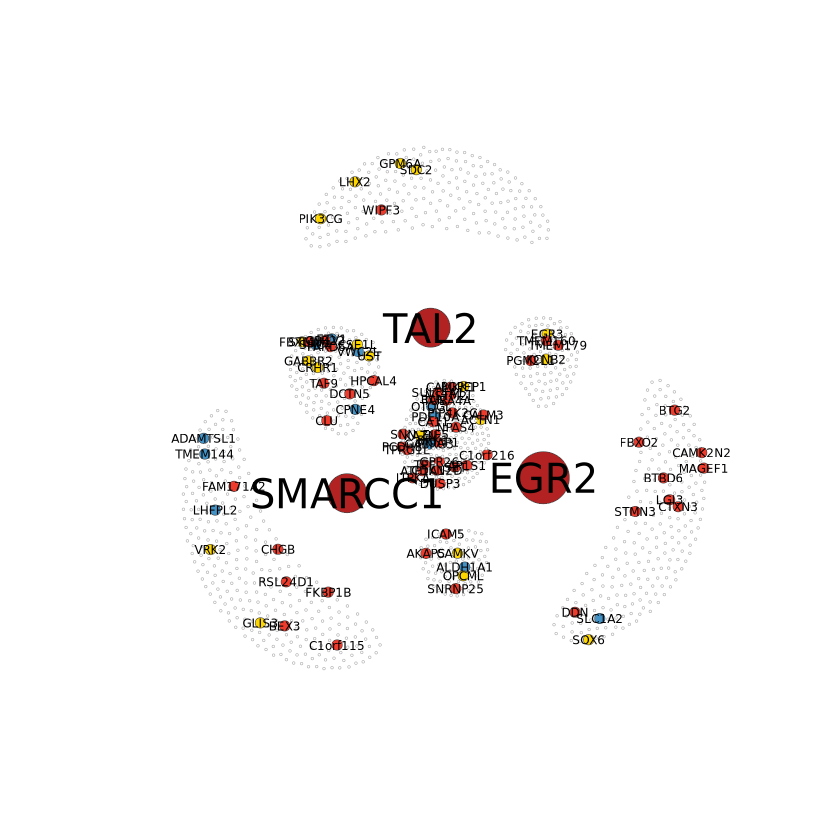

In [43]:
gr <- graph.data.frame(d = df_exc, directed = FALSE)

V(gr)$size[V(gr)$name %in% df$geneName] = 1
V(gr)$color[V(gr)$name %in% df$geneName] = 'white'
V(gr)$frame.color[V(gr)$name %in% df$geneName] = 'gray68'
                           
V(gr)$size[V(gr)$name %in% up_genes] = 4
V(gr)$color[V(gr)$name %in% up_genes] = "#EF3B2C"

V(gr)$size[V(gr)$name %in% down_genes] = 4
V(gr)$color[V(gr)$name %in% down_genes] = "#4292C6"

V(gr)$size[V(gr)$name %in% c('TAL2','SMARCC1')] = 15
V(gr)$size[V(gr)$name %in% 'EGR2'] = 20
V(gr)$color[V(gr)$name %in% exc_genes] = '#b22222'

V(gr)$size[V(gr)$name %in% ptsd_gwas] = 4
V(gr)$color[V(gr)$name %in% ptsd_gwas] = "gold"

for (deg in unique(up_genes)){
    V(gr)$label[V(gr)$name == deg] = deg
    V(gr)$label.cex[V(gr)$name == deg] = 0.6
    V(gr)$label.color[V(gr)$name == deg] = 'black'
    V(gr)$frame.color[V(gr)$name == deg] = 'gray28'
}

for (deg in unique(down_genes)){
    V(gr)$label[V(gr)$name == deg] = deg
    V(gr)$label.cex[V(gr)$name == deg] = 0.6
    V(gr)$label.color[V(gr)$name == deg] = 'black'
    V(gr)$frame.color[V(gr)$name == deg] = 'gray28'
}

for (tf_gene in unique(c(exc_genes))){
    V(gr)$label[V(gr)$name == tf_gene] = tf_gene
    V(gr)$label.cex[V(gr)$name == tf_gene] = 2
    V(gr)$label.color[V(gr)$name == tf_gene] = 'black'
    V(gr)$frame.color[V(gr)$name == tf_gene] = 'gray28'
}

for (tf_gene in unique(c(ptsd_gwas))){
    V(gr)$label[V(gr)$name == tf_gene] = tf_gene
    V(gr)$label.cex[V(gr)$name == tf_gene] = 0.6
    V(gr)$label.color[V(gr)$name == tf_gene] = 'black'
    V(gr)$frame.color[V(gr)$name == tf_gene] = 'gray28'
}

E(gr)$color = 'gray78' #   mediumpurple1   pink
E(gr)$width = 0.001
E(gr)$arrow.size = 0.0001

e <- get.edgelist(gr,names=FALSE)
layout <- qgraph.layout.fruchtermanreingold(e,vcount=vcount(gr))
plot(gr, layout = layout, vertex.label.family='Helvetica', vertex.frame.width=0.5)

In [44]:
layout <- qgraph.layout.fruchtermanreingold(e,vcount=vcount(gr))
pdf('/home/ah2428/EXC_TF.pdf', width=10, height=10)
plot(gr, layout = layout, vertex.label.family='Helvetica', vertex.frame.width=0.5,asp=0)
dev.off()

png 
  2

## ED Fig. 9g IN TF network

In [2]:
tf_inh <- read.table('/home/ah2428/ShareZhangLab/PTSD/ATAC/data/tf_cre_gene_linkage/IN_TF_CRE_Gene.csv',sep=',',header=1)

In [3]:
inh_genes <- c('WT1','ZNF238','TFAP4')
x <- tf_inh[tf_inh$TF %in% inh_genes,]
x <- x[x$Correlation > 0.6,]

In [4]:
ptsd_gwas <- unique(x[x$PTSD_GWAS=='TRUE',]$geneName)
up_genes <- unique(x[x$DEG=='UP',]$geneName)
down_genes <- unique(x[x$DEG=='DOWN',]$geneName)

In [5]:
length(ptsd_gwas)

[1] 20

In [6]:
length(up_genes)

[1] 21

In [7]:
length(down_genes)

[1] 4

In [8]:
df <- x[c('TF','geneName')]

In [9]:
df_inh <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_inh) <- c('TF', 'geneName')

for (tf in unique(df$TF)){
    df_inh <- rbind(df_inh,unique(df[df$TF==tf,]))
}

Warning message:
“`graph.data.frame()` was deprecated in igraph 2.0.0.
ℹ Please use `graph_from_data_frame()` instead.”
Warning message:
“`get.edgelist()` was deprecated in igraph 2.0.0.
ℹ Please use `as_edgelist()` instead.”


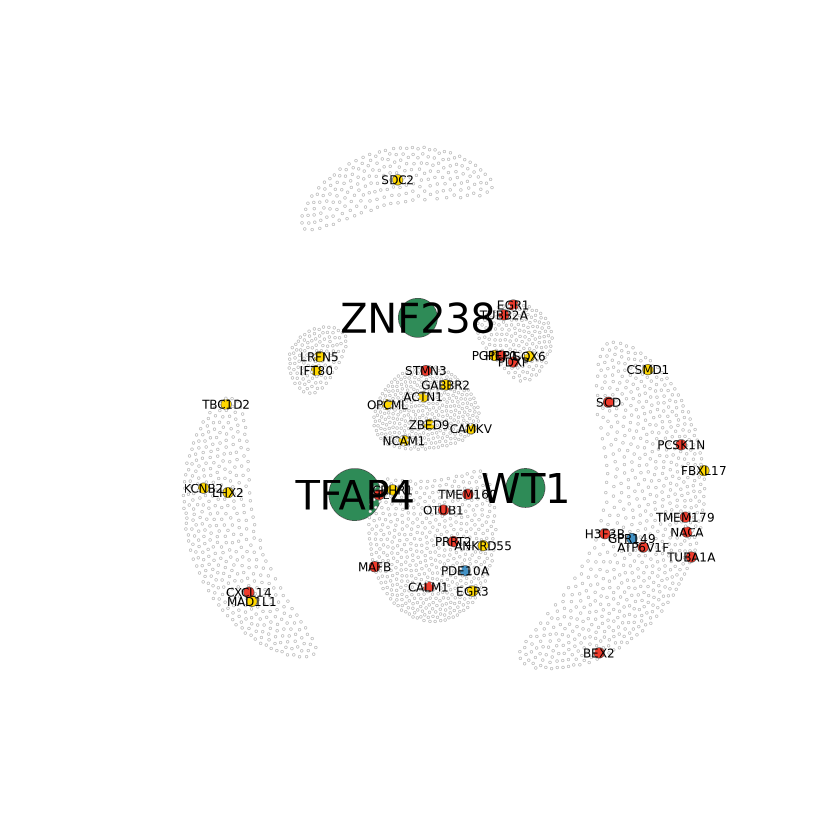

In [10]:
gr <- graph.data.frame(d = df_inh, directed = FALSE)

V(gr)$size[V(gr)$name %in% df$geneName] = 1
V(gr)$color	[V(gr)$name %in% df$geneName] = 'white'
V(gr)$frame.color[V(gr)$name %in% df$geneName] = 'gray68'

V(gr)$size[V(gr)$name %in% up_genes] = 4
V(gr)$color[V(gr)$name %in% up_genes] = "#EF3B2C"

V(gr)$size[V(gr)$name %in% down_genes] = 4
V(gr)$color[V(gr)$name %in% down_genes] = "#4292C6"

V(gr)$size[V(gr)$name %in% inh_genes[1:2]] = 15
V(gr)$size[V(gr)$name %in% 'TFAP4'] = 20
V(gr)$color[V(gr)$name %in% inh_genes] = '#2E8B57'

V(gr)$size[V(gr)$name %in% ptsd_gwas] = 4
V(gr)$color[V(gr)$name %in% ptsd_gwas] = "gold"

for (deg in unique(up_genes)){
    V(gr)$label[V(gr)$name == deg] = deg
    V(gr)$label.cex[V(gr)$name == deg] = 0.6
    V(gr)$label.color[V(gr)$name == deg] = 'black'
    V(gr)$frame.color[V(gr)$name == deg] = 'gray28'
}

for (deg in unique(down_genes)){
    V(gr)$label[V(gr)$name == deg] = deg
    V(gr)$label.cex[V(gr)$name == deg] = 0.6
    V(gr)$label.color[V(gr)$name == deg] = 'black'
    V(gr)$frame.color[V(gr)$name == deg] = 'gray28'
}

for (tf_gene in unique(c(inh_genes))){
    V(gr)$label[V(gr)$name == tf_gene] = tf_gene
    V(gr)$label.cex[V(gr)$name == tf_gene] = 2
    V(gr)$label.color[V(gr)$name == tf_gene] = 'black'
    V(gr)$frame.color[V(gr)$name == tf_gene] = 'gray28'
    
}

for (tf_gene in unique(c(ptsd_gwas))){
    V(gr)$label[V(gr)$name == tf_gene] = tf_gene
    V(gr)$label.cex[V(gr)$name == tf_gene] = 0.6
    V(gr)$label.color[V(gr)$name == tf_gene] = 'black'
    V(gr)$frame.color[V(gr)$name == tf_gene] = 'gray28'
    
}

E(gr)$color = 'gray78' #   mediumpurple1   pink
E(gr)$width = 0.0001
E(gr)$arrow.size = 0.0001

e <- get.edgelist(gr,names=FALSE)
layout <- qgraph.layout.fruchtermanreingold(e,vcount=vcount(gr))
plot(gr, layout = layout, vertex.label.family='Helvetica', vertex.frame.width=0.5)

In [11]:
layout <- qgraph.layout.fruchtermanreingold(e,vcount=vcount(gr))
pdf('/home/ah2428/INH_TF.pdf', width=10, height=10)
plot(gr, layout = layout, vertex.label.family='Helvetica', vertex.frame.width=0.5,asp=0)
dev.off()

png 
  2